<a href="https://colab.research.google.com/github/yodimalak/finper-app/blob/main/Inggrit_03_Handson_NB_KNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On #3

#Dataset
<br>
<div style='font-size:16px'>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png" width="100%"/>


The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
iris_df= "https://raw.githubusercontent.com/bayuazra23/datasets/main/Iris.csv"
df = pd.read_csv(iris_df)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#Visualisasi

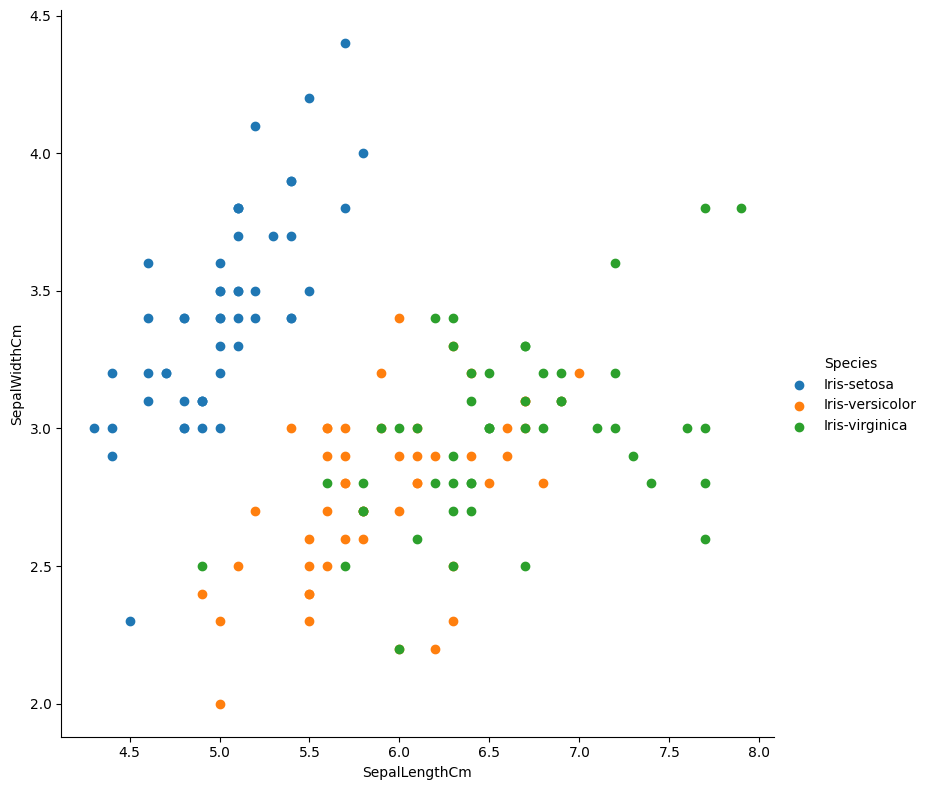

In [ ]:
sns.FacetGrid(df, hue="Species", height = 8) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

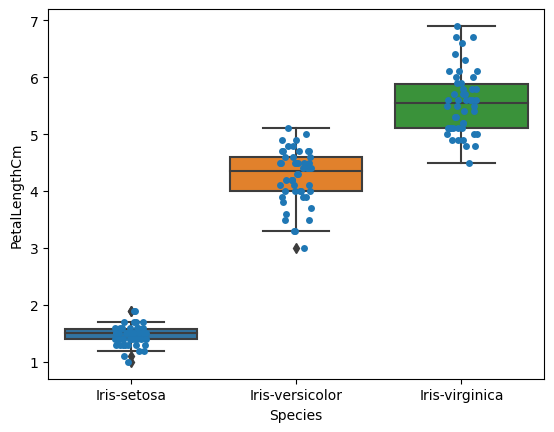

In [ ]:
ax= sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")
plt.show()

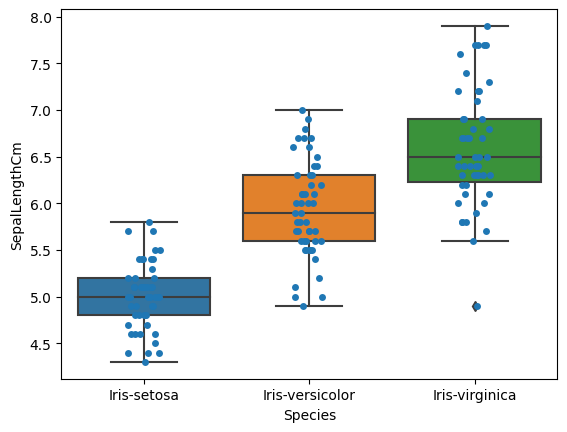

In [ ]:
ax= sns.boxplot(x="Species", y="SepalLengthCm", data=df)
ax= sns.stripplot(x="Species", y="SepalLengthCm", data=df, jitter=True, edgecolor="gray")
plt.show()

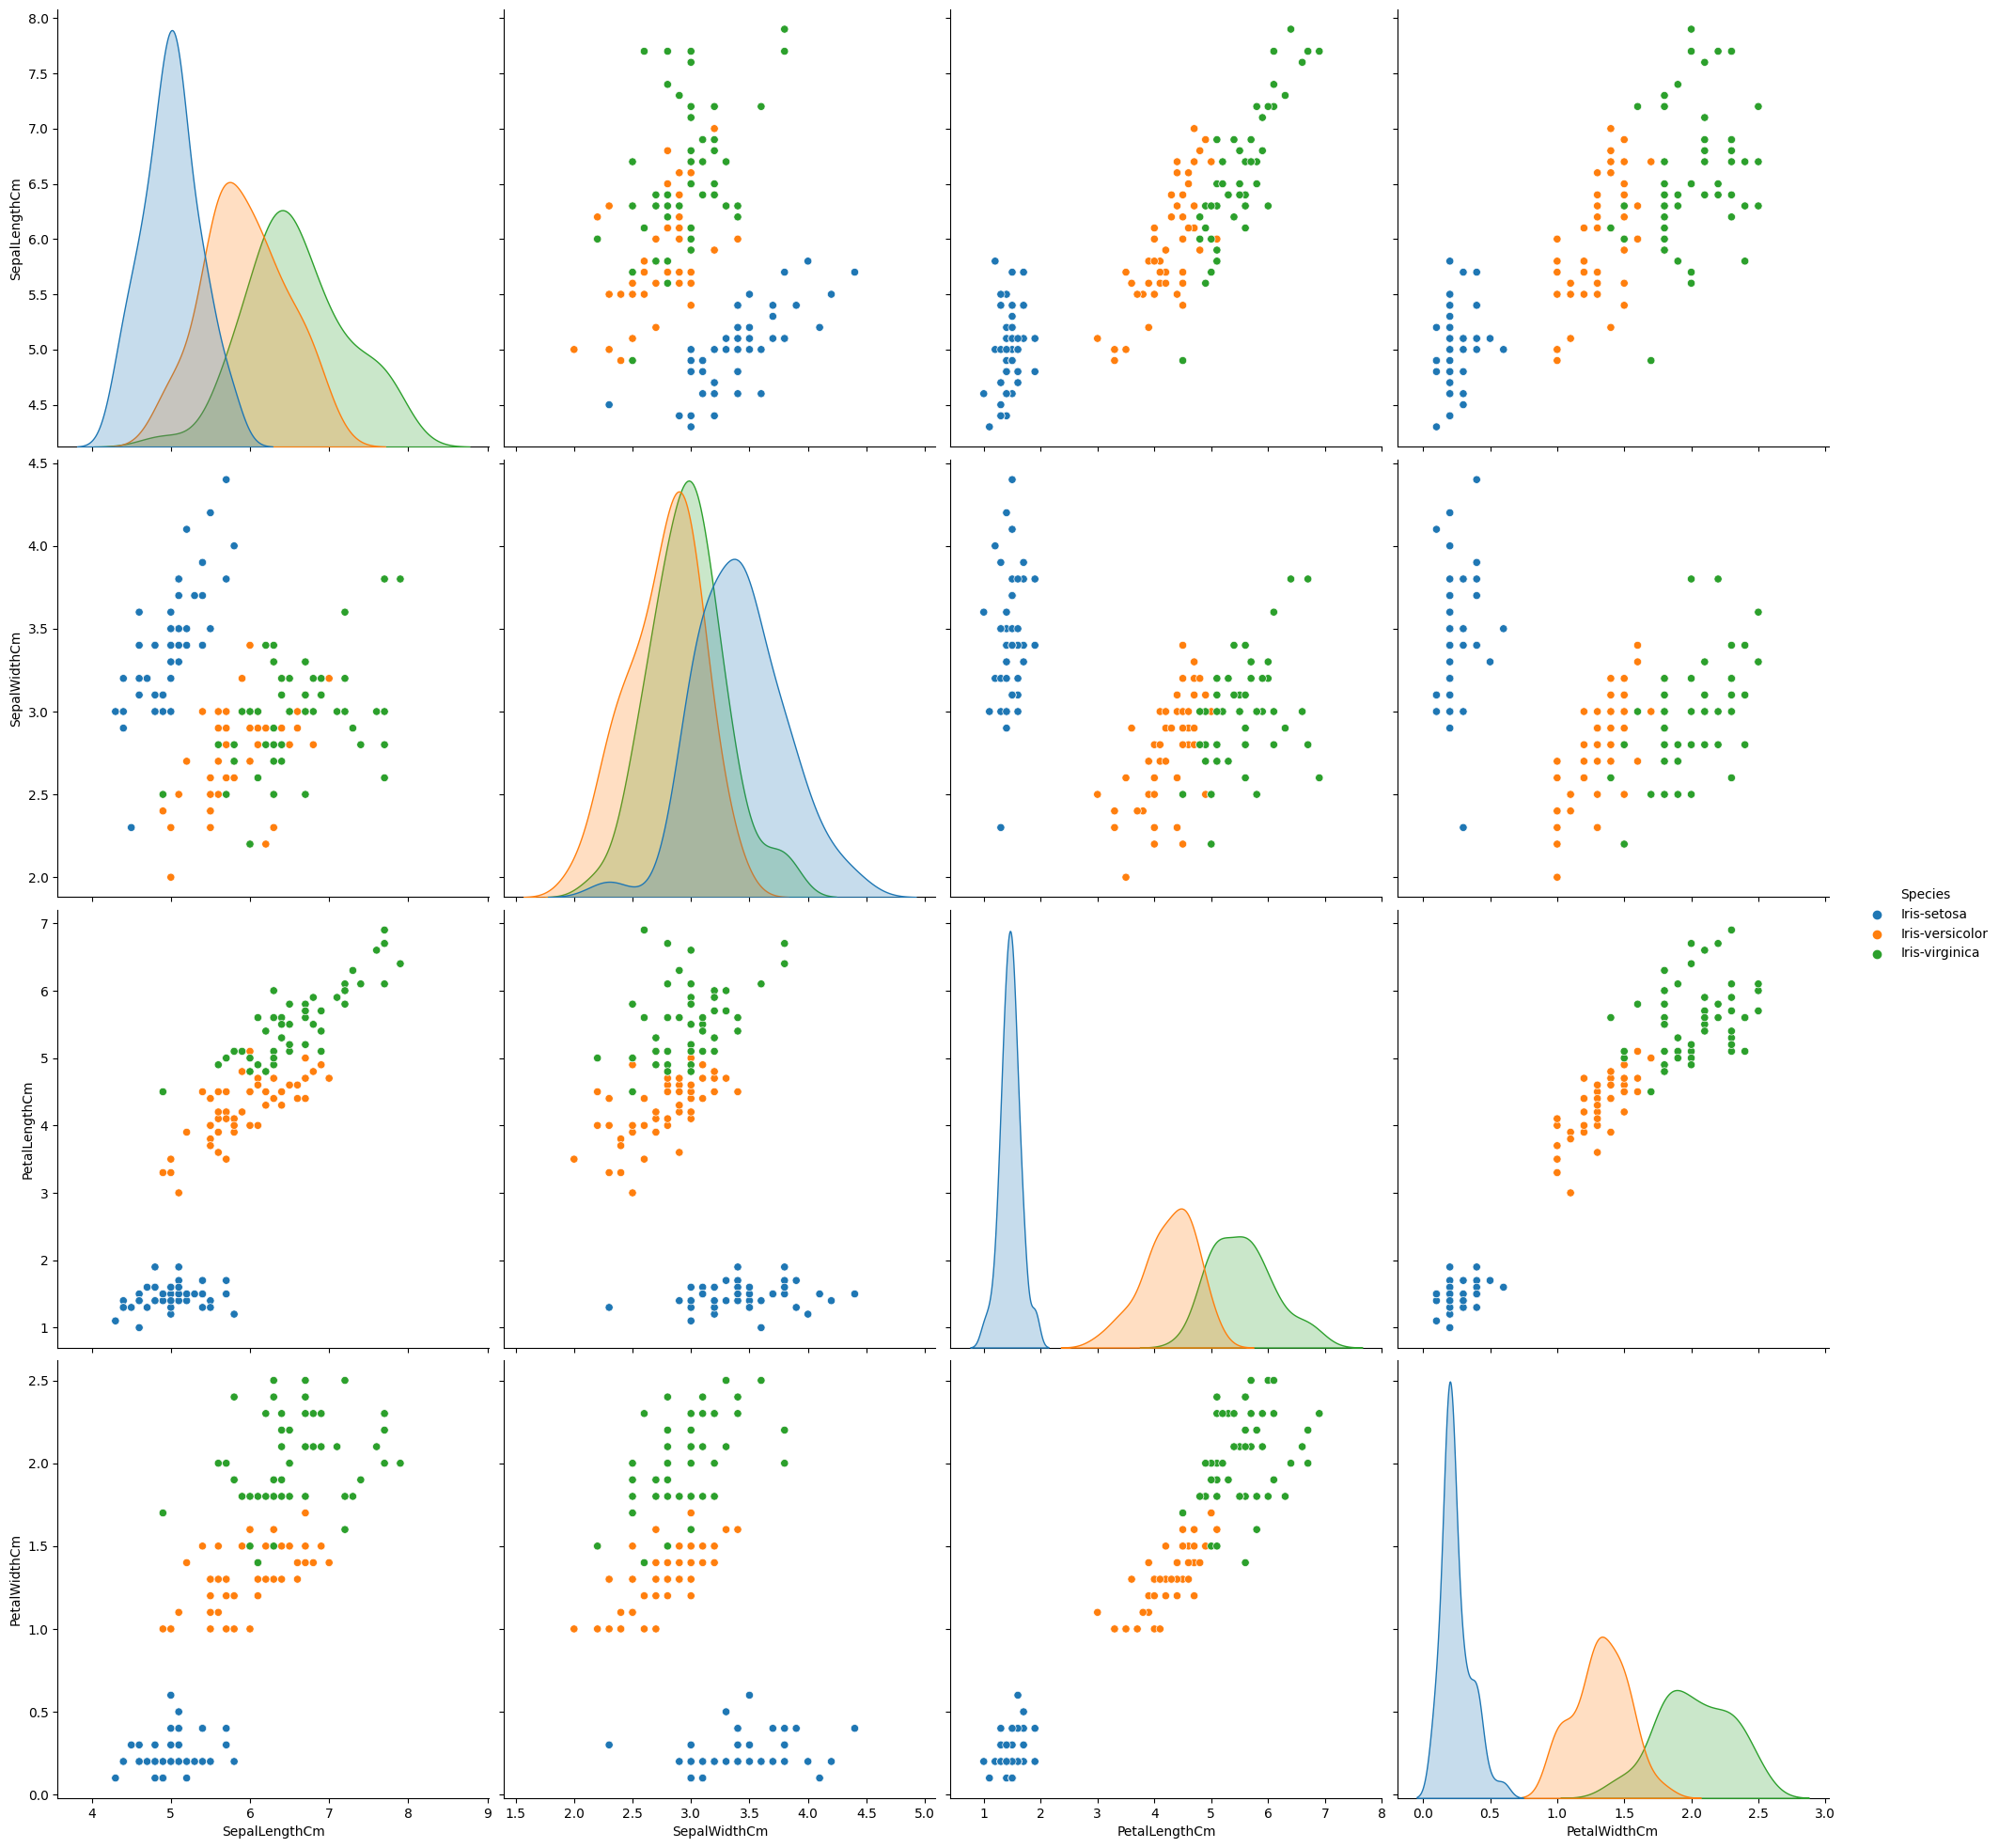

In [ ]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=5)
plt.show()

#Naive Bayes
<br>
<div style='font-size:16px'>

A naive Bayes classifier is not a single algorithm, but a family of machine learning algorithms which use probability theory to classify data with an assumption of independence between predictors It is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods

Example: Emails are given and we have to find the spam emails from that.A spam filter looks at email messages for certain key words and puts them in a spam folder if they match.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*39U1Ln3tSdFqsfQy6ndxOA.png" width="70%"/>

[Penjelasan Naive Bayes](https://www.geeksforgeeks.org/naive-bayes-classifiers/)
[Penjelasan Gausian NB](https://www.knowledgehut.com/blog/data-science/naive-bayes-in-machine-learning)



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
data_nb = df

In [ ]:
data_nb

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = data_nb.iloc[ : , [1,2,3,4]].values
y = data_nb.iloc[:, 5].values

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [ ]:
#algoritma
classifier=GaussianNB()
#training
classifier.fit(X_train,y_train)

#evaluasi
y_pred=classifier.predict(X_test)
#ytest kunci jawaban, ypred hasil prediksi model ML
acc=accuracy_score(y_test, y_pred)
print(acc)

0.9666666666666667


In [ ]:
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4]])

In [ ]:
y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

#K-Nearest Neighbor

K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified.

[Penjelasan KNN](https://www.freecodecamp.org/news/k-nearest-neighbors-algorithm-classifiers-and-model-example/)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
data_knn = df

In [ ]:
X = data_knn.iloc[:, [1,2,3,4]].values
y = data_knn.iloc[:, 5].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.9666666666666667


#Support Vector Machine
<br>
<div style='font-size:16px'>

Support Vector Machines are perhaps one of the most popular and talked about machine learning algorithms.It is primarily a classier method that performs classification tasks by constructing hyperplanes in a multidimensional space that separates cases of different class labels. SVM supports both regression and classification tasks and can handle multiple continuous and categorical variables

Example: One class is linearly separable from the others like if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates

<img src="https://vitalflux.com/wp-content/uploads/2022/08/support-vector-machine-1.png" width="70%"/>

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" width="70%"/>

[SVM Explaination](https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
data_svm = df

In [ ]:
X = data_svm.iloc[:, [1,2,3,4]].values
y = data_svm.iloc[:, [1,2,3,4]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier,  X = X_train, y = y_train, cv=10)
accuracies.mean()

ValueError: ignored

#Logistic Regression

https://www.geeksforgeeks.org/understanding-logistic-regression/

#Decision Tree

https://mljar.com/blog/visualize-decision-tree/

https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm

#!!!! Cross Validation??
Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

<div> Why? data yang digunakan untuk train dan test mewakili keseluruhan dataset</div>



<img src="https://it.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1676051588233.jpg" width="70%"/>

<div> Train test split VS cross validation</div>

<img src="https://3.bp.blogspot.com/-6zUk1fxiBhI/W_Z2ci9NCQI/AAAAAAAAAg0/ewPI85L3O1kKgxvieTURKcL1rMFDkw8MQCLcBGAs/s1600/1.PNG" width="70%"/>


_________________________________________________________________________________________________________________________________________________________________